## Dependency imports

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Import

In [46]:
# Assign spreadsheet filename to `file`
file = 'iris.xlsx'
df = pd.read_excel (file)
iris_df = pd.DataFrame(df,columns = ['sepal_length','sepal_width','petal_length','petal_width','label']) # 150 x 5


## Statistics calculation and display

In [40]:
def calculate_stats(iris_df):    
        '''
        Returns a dataframe object contating all the required statistics asked in question
        input: iris_df - 150 by 5 original dataset of flowers
        output: info - dataframe containing essential statistics
        '''
        ## Getting the min, max, mean, variance
        '/***********************************************/'
        sepal_length_min = iris_df.sepal_length.min()
        sepal_length_max = iris_df.sepal_length.max()
        sepal_length_mean = iris_df.sepal_length.mean()
        sepal_length_var = iris_df.sepal_length.var()
        '/***********************************************/'
        sepal_width_min = iris_df.sepal_width.min()
        sepal_width_max = iris_df.sepal_width.max()
        sepal_width_mean = iris_df.sepal_width.mean()
        sepal_width_var = iris_df.sepal_width.var()
        '/***********************************************/'
        petal_length_min = iris_df.petal_length.min()
        petal_length_max = iris_df.petal_length.max()
        petal_length_mean = iris_df.petal_length.mean()
        petal_length_var = iris_df.petal_length.var()
        '/***********************************************/'
        petal_width_min = iris_df.petal_width.min()
        petal_width_max = iris_df.petal_width.max()
        petal_width_mean = iris_df.petal_width.mean()
        petal_width_var = iris_df.petal_width.var()

        grouped = iris_df.groupby(['label']).describe()
        grouped['petal_length','var'] = iris_df.groupby(['label']).var()['petal_length'].values
        grouped['petal_width','var'] = iris_df.groupby(['label']).var()['petal_width'].values
        grouped['sepal_length','var'] = iris_df.groupby(['label']).var()['sepal_length'].values
        grouped['sepal_width','var'] = iris_df.groupby(['label']).var()['sepal_width'].values
        grouped = grouped.T # Comes out 3 by 32 so we wanted 32 by 3

        ## Within class variance
        sepal_length_sw = (grouped.loc['sepal_length','count']/150 * grouped.loc['sepal_length','var']).sum()
        sepal_width_sw = (grouped.loc['sepal_width','count']/150 * grouped.loc['sepal_width','var']).sum()
        petal_length_sw = (grouped.loc['petal_length','count']/150 * grouped.loc['petal_length','var']).sum()
        petal_width_sw = (grouped.loc['petal_width','count']/150 * grouped.loc['petal_width','var']).sum()
        #print(sepal_length_sw, sepal_width_sw, petal_length_sw, petal_width_sw)

        ## Between class variance
        sepal_length_sb = (grouped.loc['sepal_length','count']/150 * (grouped.loc['sepal_length','mean'] - sepal_length_mean) ** 2).sum()
        sepal_width_sb = (grouped.loc['sepal_width','count']/150 * (grouped.loc['sepal_width','mean'] - sepal_width_mean)**2).sum()
        petal_length_sb = (grouped.loc['petal_length','count']/150 * (grouped.loc['petal_length','mean'] - petal_length_mean)**2).sum()
        petal_width_sb = (grouped.loc['petal_width','count']/150 * (grouped.loc['petal_width','mean'] - petal_width_mean)**2).sum()
        #print(sepal_length_sb, sepal_width_sb, petal_length_sb, petal_width_sb)

        info = iris_df.describe()
        info.loc['var'] = iris_df[['sepal_length','sepal_width','petal_length','petal_width']].apply(np.var,axis = 0) 
        swb = pd.DataFrame({'sw':[sepal_length_sw,sepal_width_sw,petal_length_sw,petal_width_sw],'sb':[sepal_length_sb,sepal_width_sb,petal_length_sb,petal_width_sb]},index=['sepal_length','sepal_width','petal_length','petal_width'])
        info = info.append(swb['sw'])
        info = info.append(swb['sb'])

        
        return info

In [41]:
info = calculate_stats(iris_df)
info

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
var,0.681122,0.188713,3.095503,0.577133
sw,0.265008,0.115388,0.185188,0.041882


## Heatmap

In [44]:
def draw_heatmap(iris_df):
    iris_new = iris_df.replace({'setosa':1,'versicolor':2,'virginica':3}) # Replace labels
    corr = iris_new.corr()
    iris_new.head()
    sns.heatmap(corr,cmap='jet')

<module 'matplotlib.pyplot' from 'c:\\users\\mushfique\\appdata\\local\\programs\\python\\python37-32\\lib\\site-packages\\matplotlib\\pyplot.py'>

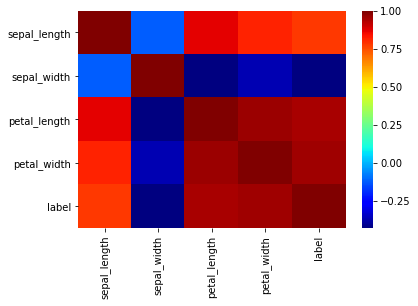

In [45]:
draw_heatmap(iris_df)

## Class vs Features plot

In [46]:
def draw_class_vs_features(iris_df):
    iris_new = iris_df.replace({'setosa':1,'versicolor':2,'virginica':3}) # Replace labels
    plt.subplot(221)
    plt.scatter(iris_new['sepal_length'],iris_new['label'],marker='x',c='r')
    plt.title('SepL vs Class')
    plt.xlim([0,8])
    plt.subplot(222)
    plt.scatter(iris_new['sepal_width'],iris_new['label'],marker='x',c='r')
    plt.title('SepW vs Class')
    plt.xlim([0,8])
    plt.subplot(223)
    plt.scatter(iris_new['petal_length'],iris_new['label'],marker='x',c='r')
    plt.title('PetL vs Class')
    plt.xlim([0,8])
    plt.subplot(224)
    plt.scatter(iris_new['petal_width'],iris_new['label'],marker='x',c='r')
    plt.title('PetW vs Class')
    plt.xlim([0,8])

    plt.tight_layout() # To make sure there is gap between the plots

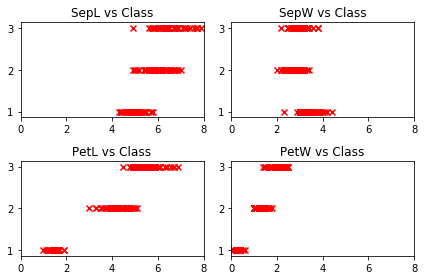

In [47]:
draw_class_vs_features(iris_df)

## Important function definitions

In [48]:
def train(X_copy,w,learning_rate):
    c = 0
    while True:
        c += 1
        res = np.dot(w,X_copy[:,:])
        indices = np.where(res <= 0)[0]
        #print(indices)
        if len(indices) == 0: break
        wrongs = X_copy[:,indices]
        summed = np.sum(wrongs,axis=1)
        w = w + learning_rate*summed
    return((c,w))

In [69]:
def flower_vs_rest_n_features_batch(iris_df,features,setosa = 1,virginica = -1,versicolor = -1):
    iris_setosa = iris_df.copy()
    iris_setosa['label'] = iris_setosa.label.replace({'setosa':setosa,'virginica':virginica,'versicolor':versicolor})
    iris_setosa[features] = iris_setosa[features]
    np.random.seed(42)
    w_ini = np.random.randn(len(features)+1,)
    learning_rate = 0.01
    X = iris_setosa[features].values
    y = iris_setosa[['label']].values
    X = np.hstack([X,np.ones((X.shape[0],1))])
    X_copy = np.copy(X)
    X_copy = X_copy.T # Making X_copy 5 by 150
    X_copy[:,y[:,0] == 0] = X_copy[:,y[:,0] == 0] *(-1)
    (c,w) =  train(X_copy,w_ini,learning_rate)
    return ((c,w,X,y))

In [50]:
def flower_vs_rest_n_features_LS(iris_df,features,setosa = 1,virginica = 0,versicolor = 0):
    iris_setosa = iris_df.copy()
    iris_setosa['label'] = iris_setosa.label.replace({'setosa':setosa,'virginica':virginica,'versicolor':versicolor})
    iris_setosa[features] = iris_setosa[features]
    X = iris_setosa[features].values
    X = np.hstack([X,np.ones((X.shape[0],1))])
    y = iris_setosa['label'].values
    W = np.dot(np.linalg.pinv(X),y)
    return (W,X,y)
    

In [38]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

## Setosa vs Rest using all features (Batch Perceptron and Least Squares)

In [52]:
(W,X_LS,y_LS) = flower_vs_rest_n_features_LS(iris_df,['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],1,0,0)
W

array([ 0.06602977,  0.24284787, -0.22465712, -0.05747273,  0.11822289])

In [53]:
(c,w,X,y) = flower_vs_rest_n_features_batch(iris_df,['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],1,0,0)
print(w)
print(c)

[ 0.48771415  2.6877357  -5.50931146 -1.21397014  0.26584663]
8


In [54]:
def calculate_misclassifications(X,y,W):
    preds = np.dot(X,W)
    return ((preds < 0.5) ==  (y==1)).sum()

## Number of misclassifications using Least Squares

In [55]:
wrongs = calculate_misclassifications(X_LS,y_LS,W)
print(wrongs)

0


## Setosa vs Rest using features 3 & 4 (Batch Perceptron and Least Squares)

In [70]:
(c,w,X,y) = flower_vs_rest_n_features_batch(iris_df,['petal_length', 'petal_width'],1,0,0)

In [71]:
print(c)
print(w)

7
[-0.75428585 -1.1992643   2.14768854]


In [58]:
(W,X_LS,y_LS) = flower_vs_rest_n_features_LS(iris_df,['petal_length', 'petal_width'],1,0,0)

In [59]:
print(W)

[-0.25132905  0.00983426  1.26603335]


## Misclassifications using LS

In [60]:
wrongs = calculate_misclassifications(X_LS,y_LS,W)
print(wrongs)

1


## Decision boundary for LS for Setosa vs Rest using features 3 & 4

(0, 4)

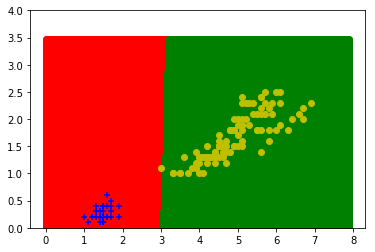

In [62]:
xx,yy = make_meshgrid(X_LS[:,0],X_LS[:,1]) # We switched X2 back again to 3x150 for it to work here
X_mesh = np.vstack([xx.ravel(),yy.ravel(),np.ones(xx.shape[0]*xx.shape[1])]) #3 by 156025
clf = np.dot(W.T,X_mesh)
plt.scatter(X_mesh[0,clf > 0.5],X_mesh[1,clf > 0.5],c='r')
plt.scatter(X_mesh[0,clf <= 0.5],X_mesh[1,clf <= 0.5],c='g')
plt.scatter(X_LS[y_LS==1,0],X_LS[y_LS==1,1],c='b',marker="+") #Since y is 2D need y[0] is used y2 then could have done y==1
plt.scatter(X_LS[y_LS==0,0],X_LS[y_LS==0,1],c='y',marker="o")
plt.ylim([0,4])

## Decision boundary for Batch Perceptron for Setosa vs Rest using features 3 & 4

(0, 4)

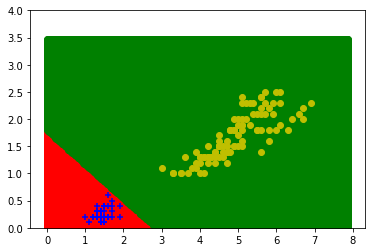

In [73]:
xx,yy = make_meshgrid(X[:,0],X[:,1]) # We switched X2 back again to 3x150 for it to work here
X_mesh = np.vstack([xx.ravel(),yy.ravel(),np.ones(xx.shape[0]*xx.shape[1])]) #3 by 156025
clf = np.dot(w.T,X_mesh)
plt.scatter(X_mesh[0,clf > 0],X_mesh[1,clf > 0],c='r')
plt.scatter(X_mesh[0,clf <= 0],X_mesh[1,clf <= 0],c='g')
plt.scatter(X[y.T[0]==1,0],X[y.T[0]==1,1],c='b',marker="+") #Since y is 2D need y[0] is used y2 then could have done y==1
plt.scatter(X[y.T[0]==0,0],X[y.T[0]==0,1],c='y',marker="o")
plt.ylim([0,4])

## Virginica vs Rest using all features (LS)

In [74]:
(W,X_LS,y_LS) = flower_vs_rest_n_features_LS(iris_df,['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],0,1,0)
W

array([-0.04587608,  0.20276839,  0.00398791,  0.55177932, -0.69528186])

## Misclassifications using LS for Virginica vs Rest all features

In [75]:
wrongs = calculate_misclassifications(X_LS,y_LS,W)
print(wrongs)

11


## Virginica vs Rest using features 3 & 4 (LS)

In [76]:
(W,X_LS,y_LS) = flower_vs_rest_n_features_LS(iris_df,['petal_length', 'petal_width'],0,1,0)
W

array([-0.07300611,  0.64025527, -0.16018919])

## Misclassifications using LS for Virginica vs Rest features 3 & 4

In [77]:
wrongs = calculate_misclassifications(X_LS,y_LS,W)
print(wrongs)

8


## Decision boundary for Virginica vs Rest using features 3 & 4

(0, 4)

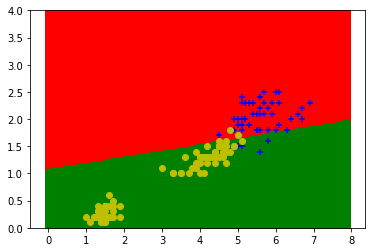

In [78]:
xx,yy = make_meshgrid(X_LS[:,0],X_LS[:,0]) # We switched X2 back again to 3x150 for it to work here
X_mesh = np.vstack([xx.ravel(),yy.ravel(),np.ones(xx.shape[0]*xx.shape[1])]) #3 by 156025
clf = np.dot(W.T,X_mesh)
plt.scatter(X_mesh[0,clf > 0.5],X_mesh[1,clf > 0.5],c='r')
plt.scatter(X_mesh[0,clf <= 0.5],X_mesh[1,clf <= 0.5],c='g')
plt.scatter(X_LS[y_LS==1,0],X_LS[y_LS==1,1],c='b',marker="+") #Since y is 2D need y[0] is used y2 then could have done y==1
plt.scatter(X_LS[y_LS==0,0],X_LS[y_LS==0,1],c='y',marker="o")
plt.ylim([0,4])

## Important functions for Multiclass classification using features 3 & 4

In [8]:
def make_label(r):
    if r['setosa'] == 1:
        return 1
    elif r['virginica'] == 1:
        return 3
    else:
        return 2
def make_array(r):
    max = r.max()
    return pd.Series(r == max).astype(int)

## Multiclass classification

In [47]:
def is_setosa(row):
    return row['label'] == 'setosa'  # boolean array of T/F
def is_virgi(row):
    return row['label'] == 'virginica'
def is_versi(row):
    return row['label'] == 'versicolor' 
setosa = iris_df.apply(is_setosa,axis = 1).astype(int) # makes it into 1s and 0s
virgi = iris_df.apply(is_virgi,axis = 1).astype(int)
versi = iris_df.apply(is_versi,axis = 1).astype(int)
Target = pd.DataFrame({'setosa':setosa,'versicolor':versi,'virginica':virgi})

In [48]:
X = iris_df[['petal_length','petal_width']]
X  = np.hstack([X,np.ones((X.shape[0],1))]) # 150 by 3 now
print(X.shape)
W = np.linalg.pinv(X)@Target
W

(150, 3)


array([[-0.25132905,  0.32433516, -0.07300611],
       [ 0.00983426, -0.65008953,  0.64025527],
       [ 1.26603335, -0.10584416, -0.16018919]])

In [49]:
res = np.dot(X,W) # preds
Results = pd.DataFrame(res,columns=['setosa','versicolor','virginica'])
R_c = Results.copy()

## Misclassification calculation

In [50]:
Results = Results.apply(make_array,axis=1)
Results['label'] = Results.apply(make_label,axis = 1)
Target['label'] = Target.apply(make_label,axis = 1)
(Results['label'] == Target['label']).sum()
# Number of misclassifications = 150-116 = 34

116

## Decision boundary for Multiclass classification using LS on features 3 & 4

(0, 7)

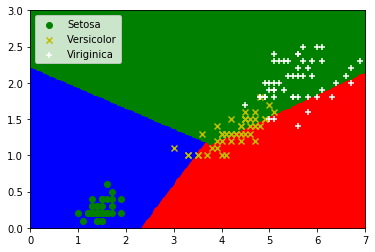

In [45]:
xx2,yy2 = make_meshgrid(X[:,0],X[:,1])
xx = np.reshape(xx2,(xx2.ravel().shape[0],1))
yy = np.reshape(yy2,(yy2.ravel().shape[0],1))
X_mesh = np.hstack([xx,yy,np.ones((xx.shape[0]*xx.shape[1],1))]) #86200 by 3 now
clf = np.dot(X_mesh,W)
Clf = pd.DataFrame(clf,columns=['setosa','versicolor','virginica'])
Clf = Clf.apply(make_array,axis=1)
Clf['label'] = Clf.apply(make_label,axis = 1)
plt.scatter(X_mesh[Clf['label']==1,0],X_mesh[Clf['label']==1,1],c='blue')
plt.scatter(X_mesh[Clf['label']==2,0],X_mesh[Clf['label']==2,1],c='red')
plt.scatter(X_mesh[Clf['label']==3,0],X_mesh[Clf['label']==3,1],c='green')
# Y = np.array(Clf['label']) # Needed to make an ndarray otherwise .reshape wasnt working and np.reshape was giving error
# Z = Y.reshape(xx2.shape) # Z needed to be a 2D array for contourf func
labels = iris_df['label'].replace({'setosa':1,'virginica':3,'versicolor':2})
# plt.contourf(xx2, yy2, Z, cmap=plt.cm.jet, alpha=.8) # xx2 and yy2 needed to be 1D i.e. (86200,)
plt.scatter(X[labels == 1,0],X[labels == 1,1],c='g',marker='o',label = 'Setosa')
plt.scatter(X[labels == 2,0],X[labels == 2,1],c='y',marker='x',label='Versicolor')
plt.scatter(X[labels == 3,0],X[labels == 3,1],c='w',marker='+',label='Viriginica') # Needed to add label arg so that when calling plt.legend() it knows which symbolto attach to which text
plt.legend()
plt.ylim([0,3])
plt.xlim([0,7])